# Netflix - Challenge

In [1]:
from scipy.linalg import svd, diagsvd
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
df = pd.read_csv('data/ratings_small.csv').drop(['timestamp'], axis=1)
dfPivot = df.pivot(index='userId', columns='movieId').fillna(2.5)
matrix = dfPivot.to_numpy()
df.shape

(100004, 3)

In [3]:
indices = dfPivot.index.to_list()
columns = [i[1] for i in dfPivot.columns.to_list()]
print(indices)
print(columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [4]:
def get_User_Movie(df):
    i = df.iloc[random.randint(0,df.shape[0]-1)]
    return indices.index(i['userId']), columns.index(i['movieId'])

In [5]:
def changeValue(matrix_b, userRow, movieColumn):
    matrix_b[userRow][movieColumn] = random.randint(1, 10) / 2
    return matrix_b

In [8]:
def comprimir(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return Uk, Sk, Vk

def decomposition(matrix_b, k):
    U, S, V = svd(matrix_b)
    M, N = matrix_b.shape
    
    Uk, Sk, Vk = comprimir(U, S, V, k)
    
    sigma = diagsvd(Sk[:k], k, k)
    
    matrix_b = Uk @ sigma @ Vk
    return matrix_b

In [11]:
dfResult = pd.DataFrame()

k_list= [50,100,150,200,500,650]

for k in k_list:
    for i in range(0,101):
        matrix_b = deepcopy(matrix)
        index, column = get_User_Movie(df)
        changeValue(matrix_b, index, column)
        matrix_b = decomposition(matrix_b, k)
        diff = abs(matrix[index][column] - matrix_b[index][column])
        print('Iteration:', i, 'K:', k, 'Matrix Original:', matrix[index][column], 'Matrix Decomposition:', matrix_b[index][column], 'Error:', diff)
        dfResult['Iteration'] = [i]
        dfResult['K'] = [k]
        dfResult['Matrix Original'] = [matrix[index][column]]
        dfResult['Matrix Decomposition'] = [matrix_b[index][column]]
        dfResult['Error'] = [diff]
    
dfResult.head()


Iteration: 0 K: 500 Matrix Original: 5.0 Matrix Decomposition: 0.4974753664270072 Error: 4.5025246335729925
Iteration: 1 K: 500 Matrix Original: 4.0 Matrix Decomposition: 4.512495158281166 Error: 0.5124951582811663
Iteration: 2 K: 500 Matrix Original: 5.0 Matrix Decomposition: 3.4916535640757975 Error: 1.5083464359242025
Iteration: 3 K: 500 Matrix Original: 3.0 Matrix Decomposition: 4.679805219793067 Error: 1.6798052197930673
Iteration: 4 K: 500 Matrix Original: 3.0 Matrix Decomposition: 0.992550848794012 Error: 2.007449151205988
Iteration: 5 K: 500 Matrix Original: 5.0 Matrix Decomposition: 2.987426411723723 Error: 2.012573588276277
Iteration: 6 K: 500 Matrix Original: 3.0 Matrix Decomposition: 4.996521526378448 Error: 1.996521526378448
Iteration: 7 K: 500 Matrix Original: 4.5 Matrix Decomposition: 2.4931284460812253 Error: 2.0068715539187747
Iteration: 8 K: 500 Matrix Original: 4.5 Matrix Decomposition: 2.014849371209828 Error: 2.485150628790172
Iteration: 9 K: 500 Matrix Original: 3

,Iteration,K,Matrix Original,Matrix Decomposition,Error
0,100,650,5.0,1.498613,3.501387


In [25]:
dfCsv = pd.read_csv('data/result.csv')

In [26]:
dfCsv.head()

,Iteration,K,Matrix Original,Matrix Decomposition,Error
0,0,50,4.5,2.666110,1.833890
1,1,50,3.5,2.832033,0.667967
2,2,50,4.0,2.835911,1.164089
3,3,50,3.5,1.331001,2.168999
4,4,50,4.0,2.813642,1.186358


In [27]:
dfCsv.describe()

,Iteration,K,Matrix Original,Matrix Decomposition,Error
count,606.000000,606.000000,606.000000,606.000000,606.000000
mean,50.000000,275.000000,3.580858,2.761864,1.409900
std,29.178844,221.448089,0.995891,1.214004,0.977145
min,0.000000,50.000000,0.500000,0.353586,0.000004
25%,25.000000,100.000000,3.000000,2.000547,0.535653
50%,50.000000,175.000000,4.000000,2.718333,1.315234
75%,75.000000,500.000000,4.000000,3.514598,1.999953
max,100.000000,650.000000,5.000000,5.231573,4.502525


Após descrevermos os dados, em geral (com todos os valores de K), podemos observar que a média da taxa de erros se manteve em torno de 1.4 com desvio-padrão de 0.97.

## Subplot de para cada valor de K

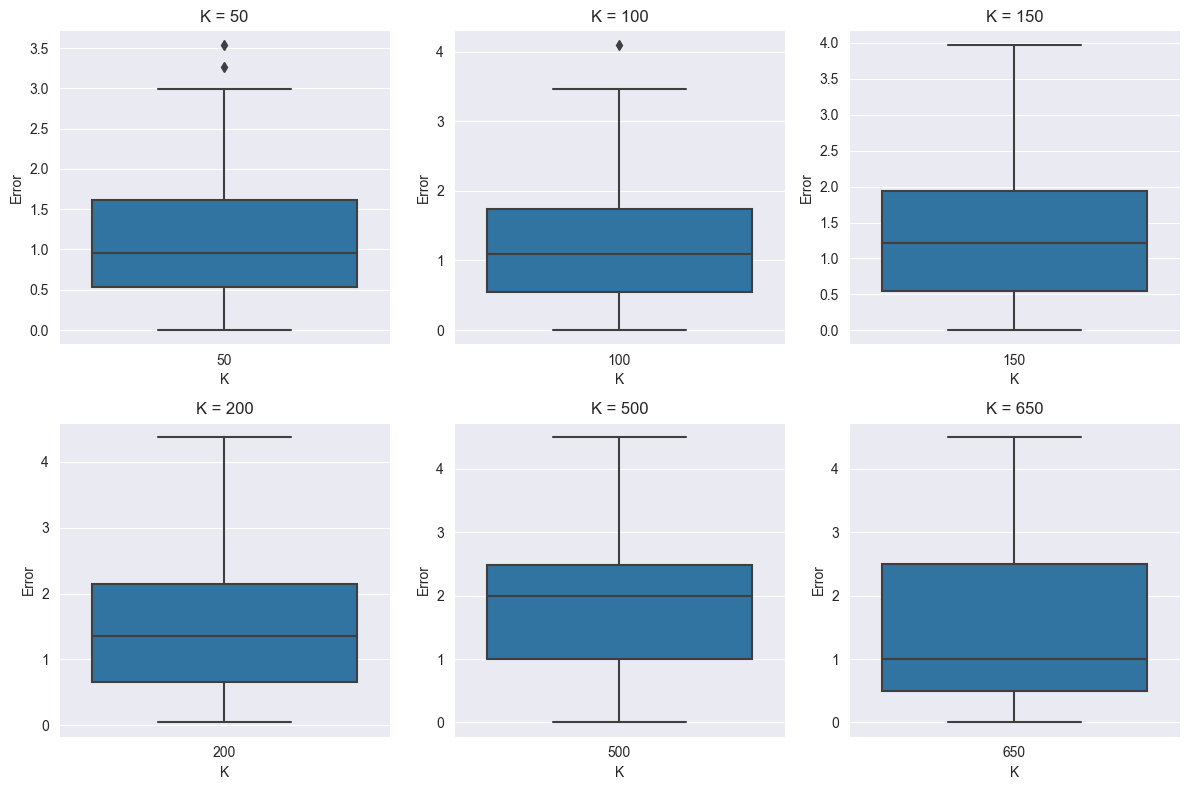

In [47]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 50])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 50')

plt.subplot(2, 3, 2)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 100])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 100')

plt.subplot(2, 3, 3)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 150])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 150')

plt.subplot(2, 3, 4)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 200])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 200')

plt.subplot(2, 3, 5)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 500])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 500')

plt.subplot(2, 3, 6)
sns.boxplot(x='K', y='Error', data=df_result[df_result['K'] == 650])
plt.xlabel('K')
plt.ylabel('Error')
plt.title('K = 650')

plt.tight_layout()
plt.show()


Acima, com um subplot 2x3, podemos visualizar em cada boxplot() a distribuição dos erros para cada valor de K.

Falando um mais do boxplot em si, nesse podemos observar a mediana (linha no centro da caixa), os quartis (limites do retângulo), valores mínimos e máximos alcançados (linhas que se estendem para fora da caixa) e possíveis valores discrepantes (pontos além das extremidades). Em outras palavras, podemos observar, nesse caso, a variação do erro em relação a cada valor de K e identificar possíveis tendências ou relações.

## Distribuição dos erros - geral

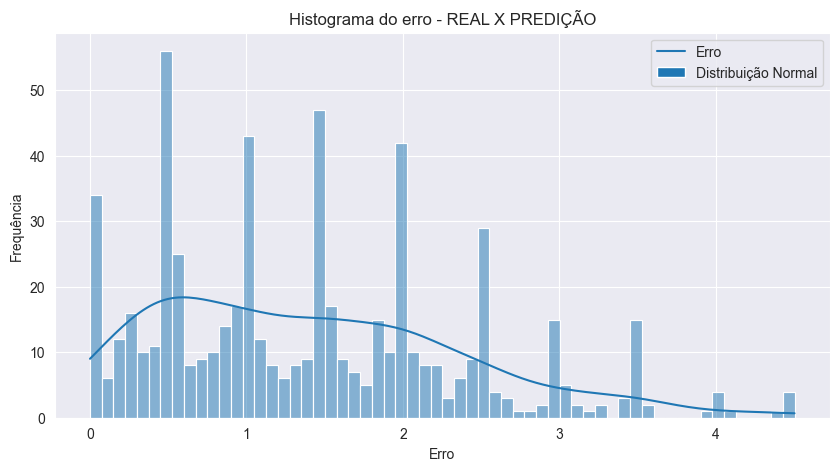

In [42]:
# sns
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.histplot(data=dfCsv, x='Error', bins=60, kde=True)
plt.title('Histograma do erro - REAL X PREDIÇÃO')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.legend(labels=['Erro', 'Distribuição Normal'])
plt.show()

## Análise do desvio-padrão e média para cada valor de K

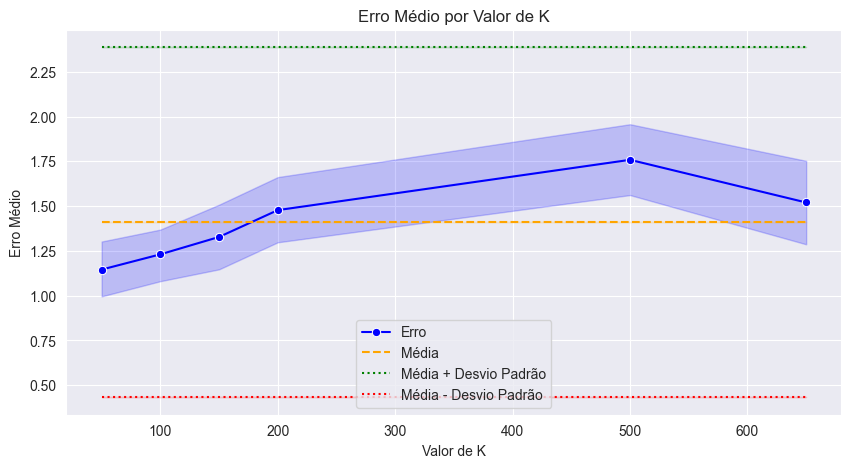

In [57]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')

average = dfCsv['Error'].mean()
std = dfCsv['Error'].std()

sns.lineplot(x=dfCsv['K'], y=dfCsv['Error'], marker='o', color='blue', label='Erro')
sns.lineplot(x=dfCsv['K'], y=[average]*len(dfCsv['K']), linestyle='--', color='orange', label='Média')
sns.lineplot(x=dfCsv['K'], y=[average+std]*len(dfCsv['K']), linestyle=':', color='green', label='Média + Desvio Padrão')
sns.lineplot(x=dfCsv['K'], y=[average-std]*len(dfCsv['K']), linestyle=':', color='red', label='Média - Desvio Padrão')

plt.title('Erro Médio por Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')
plt.legend(loc='best')
plt.grid(True)

plt.show()

Nesse caso, o eixo X está representando os diferentes valores de K, enquanto que o eixo Y o erro médio correspondente.

Legenda:
- A linha azul representa o erro médio para cada valor de K.
- A linha laranja representa a média geral do erro.
- A linha verde representa a média do erro somado com o desvio padrão.
- A linha vermelha representa a média do erro subtraído com o desvio padrão.

No geral, essa visualização nos permite observar a relação entre o valor de K e o erro médio do modelo, bem como a variabilidade desse. Além de que com ele, podemos identificar a faixa de valores de K que produzem menor erro médio e avaliar a estabilidade dos resultados com base no desvio padrão.

Obs.: Com as linhas verde e vermelha, podemos ter uma ideia da dispersão dos dados de erro em torno da média. Em outras palavras, eles nos ajudam a entender a variabilidade do desempenho do modelo para diferentes valores de K e identificar se há uma tendência consistente de melhoria ou piora à medida que esse aumenta ou diminui.